# Introduction to PyTorch

## Single Layer Neural Network

In [0]:
import torch

def sigmoid(x):
  return 1/torch.exp(-x)

features=torch.randn(1,5)
weights=torch.randn_like(features)
bias=torch.randn(1,1)

In [0]:
features#x

tensor([[ 0.3935,  1.1392, -2.2584, -0.5304, -0.7867]])

In [0]:
weights#w

tensor([[ 1.0052,  0.9432, -0.3100, -0.4460, -1.2623]])

In [0]:
bias

tensor([[-0.1119]])

In [0]:
#output = sigmoid(features*weights+bias)  ~ Forward Propagation
output=sigmoid(torch.sum(features*weights)+bias)

In [0]:
output

tensor([[26.7834]])

In [0]:
output=sigmoid(torch.matmul(features,weights.view(5,1))+bias)

In [0]:
output

tensor([[26.7835]])

## Stacking Layers

In [0]:
features=torch.randn(1,3) #x1, x2, x3

n_input=features.shape[1] #input units - 3

n_hidden_units=2 #h1, h2 - The hidden layer

n_output_units=1 # output

W1=torch.randn(n_input,n_hidden_units) # weights between the input layer and the hidden layer

W2=torch.randn(n_hidden_units,n_output_units) # weights between the hidden layer and the output layer

B1=torch.randn(1,n_hidden_units) # one bias value for each of the hidden units
B2=torch.randn(1,n_output_units) # one bias value for the output unit

In [0]:
output_1=sigmoid(torch.matmul(features,W1)+B1)

In [0]:
output_1# h1 and h2

tensor([[1.6660, 0.2683]])

In [0]:
final_output=sigmoid(torch.matmul(output_1,W2)+B2)

In [0]:
final_output # final output for forward propagation through a multi layered neural network

tensor([[0.3666]])

### Torch - NumPy Conversions

In [0]:
import numpy as np

a=np.random.rand(4,3)
b=torch.from_numpy(a)
print(a,b)

[[0.20340403 0.75413014 0.70405631]
 [0.77605336 0.15142853 0.04102927]
 [0.01938993 0.04570004 0.13560549]
 [0.00923336 0.03241983 0.85844509]] tensor([[0.2034, 0.7541, 0.7041],
        [0.7761, 0.1514, 0.0410],
        [0.0194, 0.0457, 0.1356],
        [0.0092, 0.0324, 0.8584]], dtype=torch.float64)


In [0]:
b=b.numpy()
print(b) # memory is shared so new tensors aren't made in this case; its inplace

[[0.20340403 0.75413014 0.70405631]
 [0.77605336 0.15142853 0.04102927]
 [0.01938993 0.04570004 0.13560549]
 [0.00923336 0.03241983 0.85844509]]


## Neural Networks in PyTorch

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from torchvision import datasets,transforms

transform=transforms.Compose([
                              transforms.ToTensor(),# transformation to convert PIL or numpy array to a torch tensor
                              transforms.Normalize((0.5,),(0.5,))#normalizes each of the three layers to a mean of 0.5 and a standard deviation of 0.5
])

In [0]:
trainset=datasets.MNIST('MNISTER_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True) # combines a dataset with a sampler and provides an iterable

In [0]:
dataiter=iter(trainloader) # turning the iterable into an iterator

In [0]:
images,labels=dataiter.next()

In [0]:
print(type(images),images.shape)

<class 'torch.Tensor'> torch.Size([64, 1, 28, 28])


In [0]:
print(type(labels),labels.shape)

<class 'torch.Tensor'> torch.Size([64])


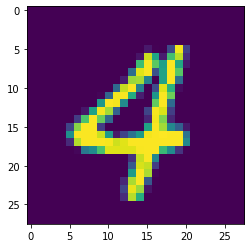

In [0]:
plt.imshow(images[0,0].numpy())

In [0]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

images=images.view(64,28*28)
n_hidden_units=256
n_output_units=10

weights_1=torch.randn(images.shape[1],n_hidden_units)
bias_1=torch.randn(1,n_hidden_units)

output_1=sigmoid(torch.matmul(images,weights_1)+bias_1)

weights_2=torch.randn(n_hidden_units,n_output_units)
bias_2=torch.randn(1,n_output_units)

final_output=torch.matmul(output_1,weights_2)+bias_2 # no activation has to be applied to the output layer

final_output.shape

torch.Size([64, 10])

In [0]:
final_output[0] # forward propagation result - probability distribution

tensor([ -9.8213,  -4.4148,  -6.9402, -10.7038,  -1.6705,   6.2378,  -9.6509,
         -0.1965,  -1.5017,   5.5847])

Our output is just a bunch of numbers that are supposed to actually be indicating a probability distribution.

To do this we use the softmax function which basically squishes each value in the output between 0 and 1 and normalizes everything to give us a proper probability distribution.

In [0]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1) # dim = 1 means summing by rows

images=images.view(64,28*28)
n_hidden_units=256
n_output_units=10

weights_1=torch.randn(images.shape[1],n_hidden_units)
bias_1=torch.randn(1,n_hidden_units)

output_1=sigmoid(torch.matmul(images,weights_1)+bias_1)

weights_2=torch.randn(n_hidden_units,n_output_units)
bias_2=torch.randn(1,n_output_units)

final_output=softmax(torch.matmul(output_1,weights_2)+bias_2) # no activation has to be applied to the output layer

final_output.shape

torch.Size([64, 10])

In [0]:
torch.sum(final_output[0]) # the sum of the probability distribution will always be one after a softmax has been applied to it

tensor(1.)

## torch.nn Module for Building Neural Networks

In [0]:
from torch import nn
'''
class Network(nn.module): # inherit the nn.Module class
  super().__init__() # run a constructor for the nn.Module parent class
  self.hidden=nn.Linear(784,256) # input to hidden layer linear transformation W1*X+B
  self.output=nn.Linear(256,10) # hidden layer to output layer linear transformation 

  self.sigmoid=nn.Sigmoid()
  self.softmax=nn.Softmax(dim=1) # dim has the same relevance here as it did in the softmax function we defined earlier

  def forward(self,x): #forward propagation
    x=self.hidden(x)
    x=self.sigmoid(x)
    x=self.output(x)
    x=self.softmax(x)
    
    return x
'''#another way of writing this is:-

import torch.nn.functional as f

class Network(nn.Module):
  def __init__(self):
    self.hidden=nn.Linear(784,256)
    self.output=nn.Linear(256,10)

  def forward(x):
    x=f.sigmoid(self.hidden(x))
    x=f.softmax(self.output(x),dim=1)
    return x

In [0]:
# create a neural network with an input layer of size 784, hidden layer 1 of size 128, hidden layer 2
# of size 64, an output layer of size 10
# use a relu activation function on both the hidden layers, a softmax function on the output layer
class Network(nn.Module):
  def __init__(self):
    self.hidden1=nn.Linear(784,256)
    self.hidden2=nn.Linear(256,64)
    self.output=nn.Linear(64,10)
  def forward(x):
    x=f.relu(self.hidden1(x))
    x=f.relu(self.hidden2(x))
    x=f.softmax(self.output(x))
    return x

  

In [0]:
#another way to do this is 
model=nn.Sequential(
    nn.Linear(784,256),
    nn.ReLU(),
    nn.Linear(256,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.Softmax(dim=1)
)
images,labels=dataiter.next()
predictions=model.forward(images.view(64,28*28))

In [0]:
predictions.shape

torch.Size([64, 10])

In [0]:
#weights for the first linear operation
model[0].weight

Parameter containing:
tensor([[-0.0254, -0.0351, -0.0334,  ..., -0.0168, -0.0349, -0.0252],
        [ 0.0227, -0.0155,  0.0102,  ..., -0.0112, -0.0118,  0.0269],
        [ 0.0230, -0.0063, -0.0101,  ...,  0.0357, -0.0072,  0.0186],
        ...,
        [ 0.0201,  0.0203,  0.0314,  ..., -0.0153,  0.0271, -0.0169],
        [ 0.0234,  0.0102,  0.0055,  ..., -0.0260, -0.0169, -0.0250],
        [-0.0111, -0.0227,  0.0157,  ...,  0.0160, -0.0041,  0.0200]],
       requires_grad=True)

In [0]:
# another way of doing it is
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model # here we're specifying out own names for the layers

In [0]:
model=nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
)
criterion=nn.CrossEntropyLoss()#loss function
images,labels=dataiter.next()
images=images.view(64,28*28)

logits=model(images)

loss=criterion(logits,labels)

In [0]:
model=nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
criterion=nn.NLLLoss()

images,labels=dataiter.next()
images=images.view(64,784)

logits=model(images)

loss=criterion(logits,labels)

In [0]:
loss.backward() # backpropagation updates the gradients on each of the layers

In [40]:
from torch import optim

epochs=100
model=nn.Sequential(
    nn.Linear(28*28,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01) # actually takes the step to update the weights

for epoch in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1)
    optimizer.zero_grad() # clear the gradients because once the weights have been updated, we dont need the previous gradients again

    output=model.forward(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step() # update weights

    running_loss+=loss.item()# loss.item() tells us the loss
  else:
    print(f'Loss for this epoch is {running_loss/len(trainloader)}')


Loss for this epoch is 0.9896341855846235


KeyboardInterrupt: ignored

In [0]:
'''
to predict do a with torch.no_grad(): this is because we dont need to be calculating the gradients when predicting
                    model.forward(testdata)

## Dense Neural Network

In [46]:
import torch
import torch.nn as nn
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from torch.optim import SGD 

transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))
]) # transformation pipeline for the data

trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)# downloading the data
trainloader=DataLoader(trainset,batch_size=64,shuffle=True)# making an iterable for the dataset

model=nn.Sequential(
    nn.Linear(28*28,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)# neural network
criterion=nn.NLLLoss() # loss function

optimizer=SGD(model.parameters(),lr=0.01) # the optimizer that updates weights
epochs=100 # number of times the neural network will go through the dataset
losses=[]
for epoch in range(epochs):
  print(f'EPOCH: {epoch}')
  running_loss=0 # total loss of all the batches
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1) # flattening the tensor
    optimizer.zero_grad()#resetting the gradients on each unit
    output=model.forward(images)#forward propagation to calculates logits
    loss=criterion(output,labels) # calculating the loss
    running_loss+=loss.item()
    loss.backward()#backward propagate to calculate gradient for each unit
    optimizer.step()# update weight based on the new gradient values
    
  else:
    epochloss=running_loss/len(trainloader) # loss in this epoch
    losses.append(epochloss)
    print(f'Loss for this epoch : {epochloss}')
    print('*'*10)

EPOCH: 0
Loss for this epoch : 1.1032723179821775
**********
EPOCH: 1
Loss for this epoch : 0.3899809421061961
**********
EPOCH: 2
Loss for this epoch : 0.32780666766104416
**********
EPOCH: 3
Loss for this epoch : 0.2967261749702984
**********
EPOCH: 4
Loss for this epoch : 0.2725922154671729
**********
EPOCH: 5
Loss for this epoch : 0.25232211225576745
**********
EPOCH: 6
Loss for this epoch : 0.23227151388775058
**********
EPOCH: 7
Loss for this epoch : 0.21372488507631618
**********
EPOCH: 8
Loss for this epoch : 0.19691435874763455
**********
EPOCH: 9
Loss for this epoch : 0.1819704613213473
**********
EPOCH: 10
Loss for this epoch : 0.16821702098700284
**********
EPOCH: 11
Loss for this epoch : 0.15632673688153467
**********
EPOCH: 12
Loss for this epoch : 0.14641257720207101
**********
EPOCH: 13
Loss for this epoch : 0.13665320461631805
**********
EPOCH: 14
Loss for this epoch : 0.12888713261442208
**********
EPOCH: 15
Loss for this epoch : 0.12123775632897102
**********
EPOCH: 

In [0]:
import numpy as np
losses=np.array(losses)
index=np.arange(len(losses))

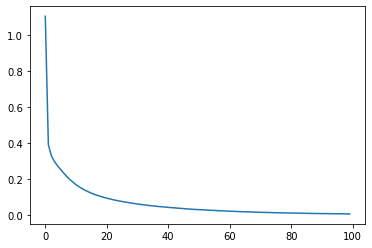

In [57]:
sns.lineplot(index,losses)

In [59]:
test=datasets.MNIST('MNIST_data_testing/',download=True,train=False,transform=transform)
testloader=DataLoader(test,batch_size=64,shuffle=True)


Extracting MNIST_data_testing/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data_testing/MNIST/raw



Extracting MNIST_data_testing/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data_testing/MNIST/raw



Extracting MNIST_data_testing/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data_testing/MNIST/raw



Extracting MNIST_data_testing/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data_testing/MNIST/raw
Processing...
Done!


In [0]:
images,labels=next(iter(testloader))    

In [62]:
images.shape

torch.Size([64, 1, 28, 28])

In [63]:
labels.shape

torch.Size([64])

In [64]:
images=images.view(images.shape[0],-1)
images.shape

torch.Size([64, 784])

In [0]:
with torch.no_grad():
  logits=model.forward(images)

In [66]:
logits.shape

torch.Size([64, 10])

In [67]:
logits[0]

tensor([-2.9698e+01, -1.3017e-04, -1.5828e+01, -1.1953e+01, -9.1018e+00,
        -2.0245e+01, -1.6529e+01, -1.1874e+01, -1.2215e+01, -1.5797e+01])

In [68]:
np.argmax(logits[0])

tensor(1)

In [69]:
labels.shape

torch.Size([64])

In [78]:
x=torch.Tensor([np.argmax(row) for row in logits])
x.shape

torch.Size([64])

In [79]:
labels.shape

torch.Size([64])

In [0]:
y=(x-labels).to_sparse()

In [100]:
y._indices().shape[1]

2

In [104]:
100-(y._indices().shape[1]/y.shape[0])*100

96.875

In [114]:
running_accuracy=0
for images,labels in testloader:
    images=images.view(images.shape[0],-1)
    with torch.no_grad():
      outputs=model.forward(images)
      predictions=torch.Tensor([np.argmax(row) for row in outputs])
      error=(predictions-labels).to_sparse()
      batch_accuracy=100-(error._indices().shape[1]/y.shape[0])*100
      running_accuracy+=batch_accuracy
print(running_accuracy/len(testloader),'%')

97.68113057324841 %
